<span style="font-size: 5em">🦜</span>

# __LangGraph Essentials__
## Lab 1: States & Nodes

<img src="../assets/States_Nodes.png" align="left" width="600" style="margin-right:15px;"/>


LangGraph organizes workflows as graphs where nodes are functions and edges define execution flow. All nodes share a common state that gets passed between them. This notebook shows how to define state, create nodes, and connect them into an executable graph.


In [1]:
from IPython.display import Image, display
import operator
from typing import Annotated, List, Literal, TypedDict
from langgraph.graph import END, START, StateGraph
from langgraph.types import Command, interrupt

<a id='state_definition'></a>

In [2]:
class State(TypedDict):
    nlist: List[str]

<a id='node_function'></a>


In [3]:
def node_a(state: State) -> State:
    print(f"node a is receiving {state['nlist']}")
    note = "Hello World from Node a"
    return(State(nlist = [note]))


<a id='graph_building'></a>

In [5]:
builder = StateGraph(State)
builder.add_node("a", node_a)
builder.add_edge(START, "a")
builder.add_edge("a", END)
graph = builder.compile()

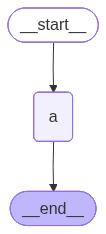

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	a(a)
	__end__([<p>__end__</p>]):::last
	__start__ --> a;
	a --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



In [7]:
display(Image(graph.get_graph().draw_mermaid_png()))
print(graph.get_graph().draw_mermaid())

<a id='graph_invoke'></a>

In [8]:
initial_state = State(
    nlist = ["Hello Node a, how are you?"]
)
graph.invoke(initial_state)

node a is receiving ['Hello Node a, how are you?']


{'nlist': ['Hello World from Node a']}

## Takeaways

Setup:

- State: All nodes share the same [state](#state_definition) which can be a Python TypedDict, dataclass, or a Pydantic BaseModel
- Nodes: Defined as simple [Python functions](#node_function) that receive state as input and return updated state

Execution (invoke):

- Runtime: When you call [invoke](#graph_invoke), the graph initializes the input state from your invoke statement and determines which nodes to run
- State Flow: Each node receives the current state as input, executes its logic, and returns an updated state
- Graph Return: After all nodes complete execution, the graph returns the final state value

Try Next:

- Add another node to the [graph](#graph_building) and connect it with edges
- Modify the print statement in the [node function](#node_function) or change the initial state message
- Extend the [State TypedDict](#state_definition) with additional fields to pass more data between nodes